In [1]:
#  1) IMPORTING THE DATA

In [2]:
import pandas as pd

dataset = pd.read_csv("data/diabetes_prediction_dataset.csv")

In [3]:
#  2) ANALYZING THE DATA

In [4]:
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [5]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
dataset['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [8]:
dataset['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [9]:
dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [10]:
dataset["diabetes"].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [11]:
#  3) VISUALIZING THE DATA

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

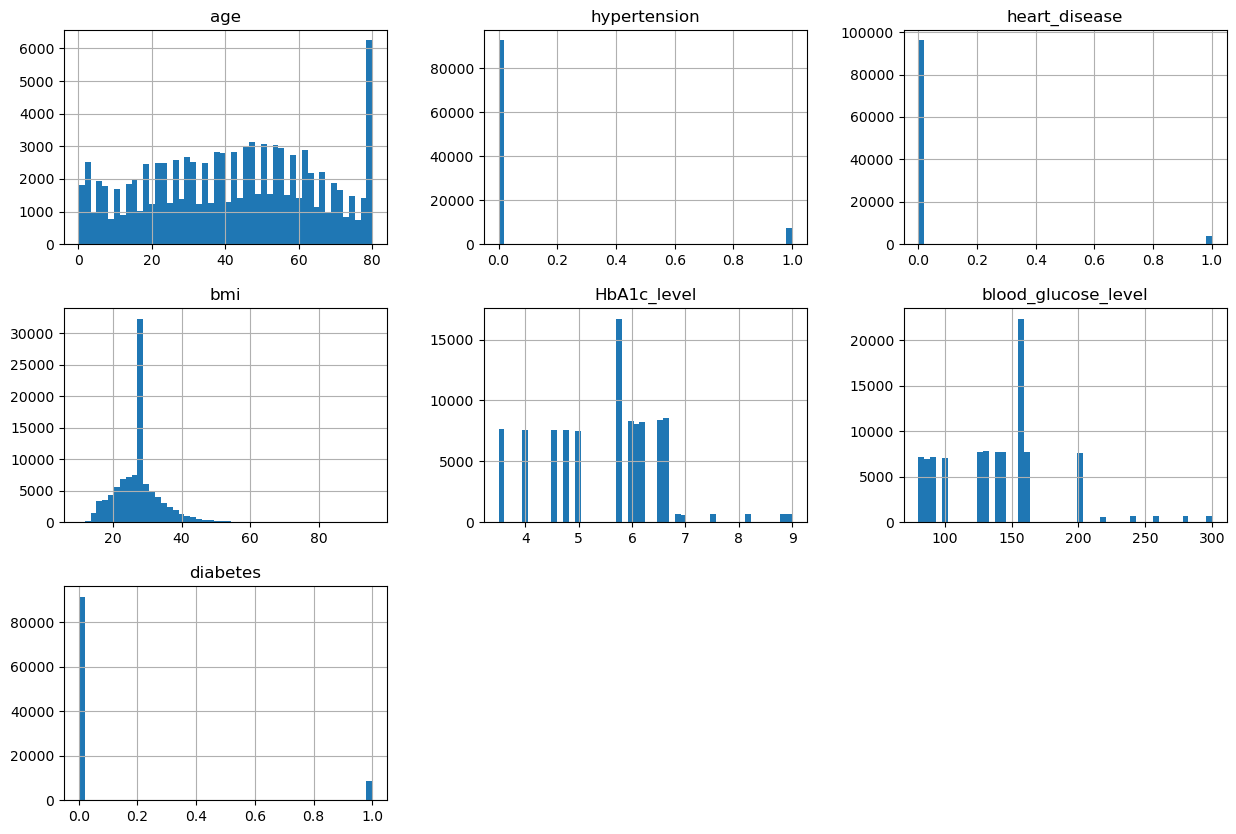

In [12]:
dataset.hist(figsize=(15,10),bins=50)

In [13]:
corr_matrix = dataset.corr(numeric_only=True) 

In [14]:
corr_matrix

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


In [15]:
corr_matrix["diabetes"].sort_values(ascending=False)

diabetes               1.000000
blood_glucose_level    0.419558
HbA1c_level            0.400660
age                    0.258008
bmi                    0.214357
hypertension           0.197823
heart_disease          0.171727
Name: diabetes, dtype: float64

In [16]:

dataset[['blood_glucose_level', 'HbA1c_level']].corr()


,blood_glucose_level,HbA1c_level
blood_glucose_level,1.000000,0.166733
HbA1c_level,0.166733,1.000000


In [17]:
#  4) PREPROCESSING THE DATA

In [18]:
X = dataset.drop(columns=["diabetes"])

In [19]:
y = dataset["diabetes"]

In [20]:
#SPLITTING THE DATA INTO TRAIN,VALIDATION AND TEST IN SAME PROPORTIONS AS THE GIVEN DATASET.

from sklearn.model_selection import train_test_split

# First split into train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Now split temp into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print("Train:", X_train.shape, y_train.value_counts(normalize=True))
print("Validation:", X_val.shape, y_val.value_counts(normalize=True))
print("Test:", X_test.shape, y_test.value_counts(normalize=True))

Train: (70000, 8) diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64
Validation: (15000, 8) diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64
Test: (15000, 8) diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64


In [21]:
#USING A PIPELINE TO DO STANDARD SCALING AND ONE HOT ENCODING

import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Identify categorical & numerical features
categorical = ["gender", "smoking_history"]
numerical = [col for col in X.columns if col not in categorical]

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical),
    ("cat", OneHotEncoder(drop="first"), categorical)
])

X_train_processed = preprocessor.fit_transform(X_train)

print("Processed shape:", X_train_processed.shape)

Processed shape: (70000, 13)


In [22]:
y_train = y_train.values.reshape(-1, 1)
y_val   = y_val.values.reshape(-1, 1)
y_test  = y_test.values.reshape(-1, 1)


In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

print("Before SMOTE:", sum(y_train==1), sum(y_train==0))
print("After SMOTE:", sum(y_train_smote==1), sum(y_train_smote==0))


Before SMOTE: [5950] [64050]
After SMOTE: 64050 64050


In [24]:
#  5)TRAINING DIFFERENT MODELS

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [26]:
# Logistic Regression
param_lr = {"C":[0.01,0.1,1,10], "solver":["liblinear","lbfgs"], 'penalty': ['l2']}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_lr, cv=5, scoring="f1")
grid_lr.fit(X_train_smote, y_train_smote)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='f1')

In [27]:

for param, value in grid_lr.best_params_.items():
    print(f"{param}: {value}")


C: 10
penalty: l2
solver: liblinear


In [28]:
X_val_processed = preprocessor.transform(X_val)

y_pred = grid_lr.predict(X_val_processed)
y_proba = grid_lr.predict_proba(X_val_processed)[:, 1]

from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score
print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:\n", cm)

print("\nROC AUC:\n", roc_auc_score(y_val, y_proba))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     13725
           1       0.43      0.89      0.58      1275

    accuracy                           0.89     15000
   macro avg       0.71      0.89      0.76     15000
weighted avg       0.94      0.89      0.91     15000


Confusion Matrix:
 [[12239  1486]
 [  145  1130]]

ROC AUC:
 0.964170977534912


In [29]:
from sklearn.model_selection import RandomizedSearchCV
# Decision Tree

param_dt = {'max_depth': [3, 5, 7, 9, 12, None], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 5, 10],
            'max_features': [None, 'sqrt', 'log2'],'class_weight': [None, 'balanced']}
random_dt = RandomizedSearchCV(DecisionTreeClassifier(), param_dt, cv=5, scoring="f1", random_state = 42)
random_dt.fit(X_train_smote, y_train_smote)


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'max_depth': [3, 5, 7, 9, 12, None],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20]},
                   random_state=42, scoring='f1')

In [30]:

for param, value in random_dt.best_params_.items():
    print(f"{param}: {value}")


min_samples_split: 20
min_samples_leaf: 1
max_features: sqrt
max_depth: None
class_weight: None


In [31]:
y_pred = random_dt.predict(X_val_processed)
y_proba = random_dt.predict_proba(X_val_processed)[:, 1]

from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score
print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:\n", cm)

print("\nROC AUC:\n", roc_auc_score(y_val, y_proba))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     13725
           1       0.63      0.76      0.69      1275

    accuracy                           0.94     15000
   macro avg       0.80      0.86      0.83     15000
weighted avg       0.95      0.94      0.94     15000


Confusion Matrix:
 [[13150   575]
 [  304   971]]

ROC AUC:
 0.9198925961641489


In [32]:
#RANDOM FOREST

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distributions

param_rf = {
    "n_estimators": [50, 100, 150],       # number of trees
    "max_depth": [5, 10, 15, None],       # maximum depth of trees
    "min_samples_split": [2, 5, 10],      # minimum samples to split a node
    "min_samples_leaf": [1, 2, 4],        # minimum samples at a leaf
    "max_features": ["sqrt", "log2", None],  # features to consider for split
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

# Initialize Random Forest with parallel processing
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

# RandomizedSearchCV: try only a fixed number of combinations
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_rf,
    n_iter=10,        # only 10 random combinations
    cv=5,
    scoring="f1",
    verbose=2,
    random_state=42
)
# Fit on SMOTE-resampled balanced dataset
random_search_rf.fit(X_train_smote, y_train_smote)

# Best parameters and score
print("Best parameters:", random_search_rf.best_params_)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END class_weight=balanced_subsample, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   8.3s
[CV] END class_weight=balanced_subsample, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   7.0s
[CV] END class_weight=balanced_subsample, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   8.0s
[CV] END class_weight=balanced_subsample, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   7.1s
[CV] END class_weight=balanced_subsample, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   8.1s
[CV] END class_weight=None, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   5.7s
[CV] END class_weight=None, max_dep

In [34]:
for param, value in random_search_rf.best_params_.items():
    print(f"{param}: {value}")


n_estimators: 100
min_samples_split: 5
min_samples_leaf: 4
max_features: None
max_depth: None
class_weight: balanced_subsample


In [35]:
y_pred = random_search_rf.predict(X_val_processed)
y_proba = random_search_rf.predict_proba(X_val_processed)[:, 1]

from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score
print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:\n", cm)

print("\nROC AUC:\n", roc_auc_score(y_val, y_proba))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13725
           1       0.83      0.72      0.77      1275

    accuracy                           0.96     15000
   macro avg       0.90      0.86      0.88     15000
weighted avg       0.96      0.96      0.96     15000


Confusion Matrix:
 [[13534   191]
 [  352   923]]

ROC AUC:
 0.9708224150862531


In [36]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb_param_dist = {
    'n_estimators': [100, 300, 500, 800],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 8],
    'subsample': [0.5, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.4, 0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5, 7],
}

# Initialize model  
xgb = XGBClassifier(
    n_jobs=-1,
    random_state=42,
    eval_metric="logloss",
    use_label_encoder=False
)

# RandomizedSearchCV
xgb_model = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_dist,
    n_iter=10,
    cv=5,
    scoring="f1",
    verbose=2,
    n_jobs=-1   
)

# Fit XGBoost on training data
xgb_model.fit(X_train_smote, y_train_smote)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=-1,
                                           num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.4, 0.6, 0.8,
                                                             1.0],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.2],
                                        'max_depth': [3, 4, 5, 6, 8],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 300, 500, 800],
                                        'subsample': [0.5, 0.7, 0.8, 1.0]},
                   scoring='f1', verbose=2)

In [37]:
for param, value in xgb_model.best_params_.items():
    print(f"{param}: {value}")


subsample: 0.8
n_estimators: 500
min_child_weight: 1
max_depth: 8
learning_rate: 0.05
colsample_bytree: 0.6


In [38]:
y_pred = xgb_model.predict(X_val_processed)
y_proba = xgb_model.predict_proba(X_val_processed)[:, 1]

from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score
print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:\n", cm)

print("\nROC AUC:\n", roc_auc_score(y_val, y_proba))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13725
           1       0.91      0.71      0.80      1275

    accuracy                           0.97     15000
   macro avg       0.94      0.85      0.89     15000
weighted avg       0.97      0.97      0.97     15000


Confusion Matrix:
 [[13633    92]
 [  364   911]]

ROC AUC:
 0.9779930140362156


In [39]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

models = {
    "Logistic Regression": grid_lr.best_estimator_,
    "Decision Tree": random_dt.best_estimator_,
    "Random Forest": random_search_rf.best_estimator_,
    "XGBoost": xgb_model
}

for name, model in models.items():
    y_pred = model.predict(X_val_processed)  
    print(f"--- {name} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
    print("Accuracy :", accuracy_score(y_val, y_pred))
    print("Precision:", precision_score(y_val, y_pred))
    print("Recall   :", recall_score(y_val, y_pred))
    print("F1 Score :", f1_score(y_val, y_pred))
    print("ROC-AUC:", roc_auc_score(y_val, model.predict_proba(X_val_processed)[:,1]))
    print("\n")


--- Logistic Regression ---
Confusion Matrix:
 [[12239  1486]
 [  145  1130]]
Accuracy : 0.8912666666666667
Precision: 0.4319571865443425
Recall   : 0.8862745098039215
F1 Score : 0.5808275507581598
ROC-AUC: 0.964170977534912


--- Decision Tree ---
Confusion Matrix:
 [[13150   575]
 [  304   971]]
Accuracy : 0.9414
Precision: 0.628072445019405
Recall   : 0.7615686274509804
F1 Score : 0.6884083658277207
ROC-AUC: 0.9198925961641489


--- Random Forest ---
Confusion Matrix:
 [[13534   191]
 [  352   923]]
Accuracy : 0.9638
Precision: 0.8285457809694794
Recall   : 0.7239215686274509
F1 Score : 0.7727082461280871
ROC-AUC: 0.9708224150862531


--- XGBoost ---
Confusion Matrix:
 [[13633    92]
 [  364   911]]
Accuracy : 0.9696
Precision: 0.9082751744765702
Recall   : 0.7145098039215686
F1 Score : 0.7998244073748902
ROC-AUC: 0.9779930140362156




In [40]:
#DEEP NEURAL NETWORK

In [41]:
def balanced_batch_generator(X, y):
    y = y.ravel() 
    X_pos = X[y == 1]
    y_pos = y[y == 1]

    X_neg = X[y == 0]
    y_neg = y[y == 0]

    n_pos = len(y_pos)

    while True:
        idx_neg = np.random.permutation(len(y_neg))
        X_neg_shuffled = X_neg[idx_neg]
        y_neg_shuffled = y_neg[idx_neg]

        for i in range(0, len(y_neg_shuffled), n_pos):
            X_batch_neg = X_neg_shuffled[i:i+n_pos]
            y_batch_neg = y_neg_shuffled[i:i+n_pos]

            current_batch_size = min(len(X_batch_neg), n_pos)
            X_batch = np.vstack((X_pos[:current_batch_size], X_batch_neg[:current_batch_size]))
            y_batch = np.hstack((y_pos[:current_batch_size], y_batch_neg[:current_batch_size]))

            # Shuffle batch
            idx = np.random.permutation(len(y_batch))
            yield X_batch[idx], y_batch[idx]


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.layers import BatchNormalization

X_train_processed = np.array(X_train_processed)
y_train = np.array(y_train).ravel()
X_val_processed = np.array(X_val_processed)
y_val = np.array(y_val).ravel()

# Define DNN model 

model = Sequential([
    Input(shape=(X_train_processed.shape[1],)),  # input layer
    
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),

    Dense(32),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(32),
    BatchNormalization(),
    Activation('relu'),

    Dense(16),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(16),
    BatchNormalization(),
    Activation('relu'),

    Dense(8),
    BatchNormalization(),
    Activation('relu'),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile model with metrics for imbalanced data
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
)

# Compute steps per epoch
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
steps_per_epoch = n_neg // n_pos  # integer

# Create generator
train_gen = balanced_batch_generator(X_train_processed, y_train)

# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_auc',   # Monitor AUC for best performance on validation set
    mode='max',
    patience=3,
    restore_best_weights=True
)



# Fit model
history = model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_data=(X_val_processed, y_val),
    callbacks=[early_stop]
)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 498ms/step - accuracy: 0.5927 - auc: 0.6277 - loss: 0.6771 - precision: 0.5667 - recall: 0.7880 - val_accuracy: 0.4128 - val_auc: 0.7257 - val_loss: 0.6899 - val_precision: 0.1262 - val_recall: 0.9969
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 302ms/step - accuracy: 0.7528 - auc: 0.8338 - loss: 0.5540 - precision: 0.6868 - recall: 0.9294 - val_accuracy: 0.4832 - val_auc: 0.8715 - val_loss: 0.6823 - val_precision: 0.1408 - val_recall: 0.9961
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 421ms/step - accuracy: 0.8099 - auc: 0.8913 - loss: 0.4921 - precision: 0.7465 - recall: 0.9385 - val_accuracy: 0.5587 - val_auc: 0.9288 - val_loss: 0.6752 - val_precision: 0.1609 - val_recall: 0.9945
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 303ms/step - accuracy: 0.8409 - auc: 0.9156 - loss: 0.4437 - precision: 0.7914 - recall: 0.9258 - val_accuracy: 0.6241 - val_auc: 0.9492 - val_loss: 0.6614 - val_precision: 0.1836 - val_recall: 0.9929
Epoch 5/50
10/10 ━━━━━━━━━━━━━━

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             

 Total params: 57,749 (225.59 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 720 (2.81 KB)

 Optimizer params: 38,020 (148.52 KB)

In [44]:
# Probabilities for the positive class
y_val_pred_prob = model.predict(X_val_processed).ravel()  # shape (n_samples,)

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


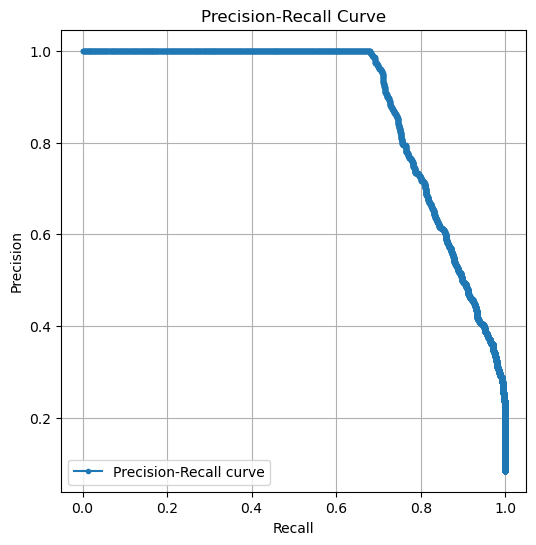

Best threshold (F1): 0.885, Precision: 0.956, Recall: 0.708


In [45]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
precision, recall, thresholds_pr = precision_recall_curve(y_val, y_val_pred_prob)

plt.figure(figsize=(6,6))
plt.plot(recall, precision, marker='.', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.show()

# Optionally, pick threshold with best F1 score
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)  # avoid div by 0
best_idx = np.argmax(f1_scores)
best_threshold = thresholds_pr[best_idx]
print(f"Best threshold (F1): {best_threshold:.3f}, Precision: {precision[best_idx]:.3f}, Recall: {recall[best_idx]:.3f}")


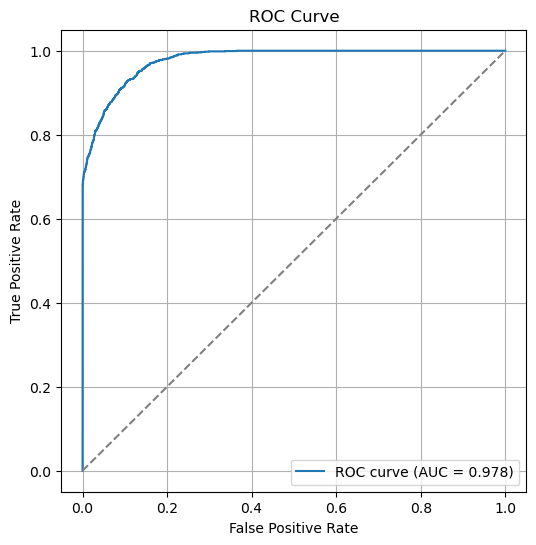

In [46]:
fpr, tpr, thresholds_roc = roc_curve(y_val, y_val_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')  # random line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.legend()
plt.show()


In [47]:
y_val_pred_final = (y_val_pred_prob >= 0.76).astype(int)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred_final))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_final, digits=4))

print("\nROC AUC:\n", roc_auc_score(y_val, y_val_pred_prob))

Confusion Matrix:
[[13426   299]
 [  290   985]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9789    0.9782    0.9785     13725
           1     0.7671    0.7725    0.7698      1275

    accuracy                         0.9607     15000
   macro avg     0.8730    0.8754    0.8742     15000
weighted avg     0.9609    0.9607    0.9608     15000


ROC AUC:
 0.9782964248723168


In [49]:
!pip install scikeras


In [50]:
from scikeras.wrappers import KerasClassifier

def build_dnn():
    model = Sequential([
    Input(shape=(X_train_processed.shape[1],)),  # input layer
    
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),

    Dense(32),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(32),
    BatchNormalization(),
    Activation('relu'),

    Dense(16),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Dense(16),
    BatchNormalization(),
    Activation('relu'),

    Dense(8),
    BatchNormalization(),
    Activation('relu'),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

    model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')])
    
    return model

dnn_wrapper = KerasClassifier(build_fn=build_dnn, epochs=50, batch_size=64, verbose=0)


In [51]:
#ENSEMBLE

In [52]:
ensemble = VotingClassifier(
    estimators=[
        ("xgb", xgb_model),
        ("rf", random_search_rf.best_estimator_),
        ("logreg", grid_lr.best_estimator_),
        ("dnn", dnn_wrapper)
    ],
    voting="soft",
    weights=[0.3, 0.25, 0.25, 0.3]
)


In [53]:
# Fit on training data
ensemble.fit(X_train_processed, y_train)

# Predict on validation set
y_pred = ensemble.predict(X_val_processed)
y_proba = ensemble.predict_proba(X_val_processed)[:, 1]

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nROC-AUC:", roc_auc_score(y_val, y_proba))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Confusion Matrix:
 [[13703    22]
 [  379   896]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     13725
           1       0.98      0.70      0.82      1275

    accuracy                           0.97     15000
   macro avg       0.97      0.85      0.90     15000
weighted avg       0.97      0.97      0.97     15000


ROC-AUC: 0.9778398085645916


In [54]:
# Convert to final predictions with threshold adjustment
y_pred_ensemble = (y_proba >= 0.30).astype(int)

In [55]:
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_ensemble))
print("\nClassification Report:\n", classification_report(y_val, y_pred_ensemble))
print("\nROC-AUC:", roc_auc_score(y_val, y_proba))


Confusion Matrix:
 [[13480   245]
 [  303   972]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     13725
           1       0.80      0.76      0.78      1275

    accuracy                           0.96     15000
   macro avg       0.89      0.87      0.88     15000
weighted avg       0.96      0.96      0.96     15000


ROC-AUC: 0.9778398085645916


In [56]:
!pip install shap


In [57]:
#MODEL EVALUATION

In [58]:
# Preprocess test data
X_test_processed = preprocessor.transform(X_test)

# Get predicted probabilities from ensemble
y_proba_ensemble = ensemble.predict_proba(X_test_processed)[:, 1]

# Apply chosen threshold (0.30)
threshold = 0.30
y_pred_ensemble = (y_proba_ensemble >= threshold).astype(int)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report:\n", classification_report(y_test, y_pred_ensemble, digits=4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))
print("\nROC-AUC:", roc_auc_score(y_test, y_proba_ensemble))


Classification Report:
               precision    recall  f1-score   support

           0     0.9765    0.9855    0.9810     13725
           1     0.8268    0.7451    0.7838      1275

    accuracy                         0.9651     15000
   macro avg     0.9017    0.8653    0.8824     15000
weighted avg     0.9638    0.9651    0.9642     15000


Confusion Matrix:
 [[13526   199]
 [  325   950]]

ROC-AUC: 0.9763595271259686


In [59]:
# Get transformed feature names (numerical + encoded categorical)
feature_names = preprocessor.get_feature_names_out()

print(feature_names)


['num__age' 'num__hypertension' 'num__heart_disease' 'num__bmi'
 'num__HbA1c_level' 'num__blood_glucose_level' 'cat__gender_Male'
 'cat__gender_Other' 'cat__smoking_history_current'
 'cat__smoking_history_ever' 'cat__smoking_history_former'
 'cat__smoking_history_never' 'cat__smoking_history_not current']


In [60]:


X_test_processed = preprocessor.transform(X_test)
X_test_df = pd.DataFrame(X_test_processed, columns=feature_names)


In [61]:
X_test_df.columns = (
    X_test_df.columns
    .str.replace('num__', '', regex=False)
    .str.replace('cat__', '', regex=False)
    .str.replace('_', ' ')
)


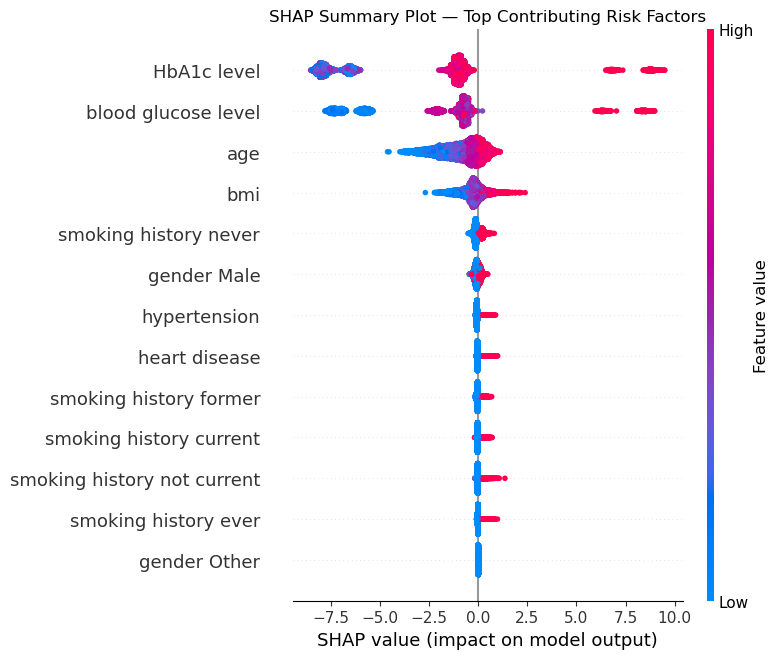

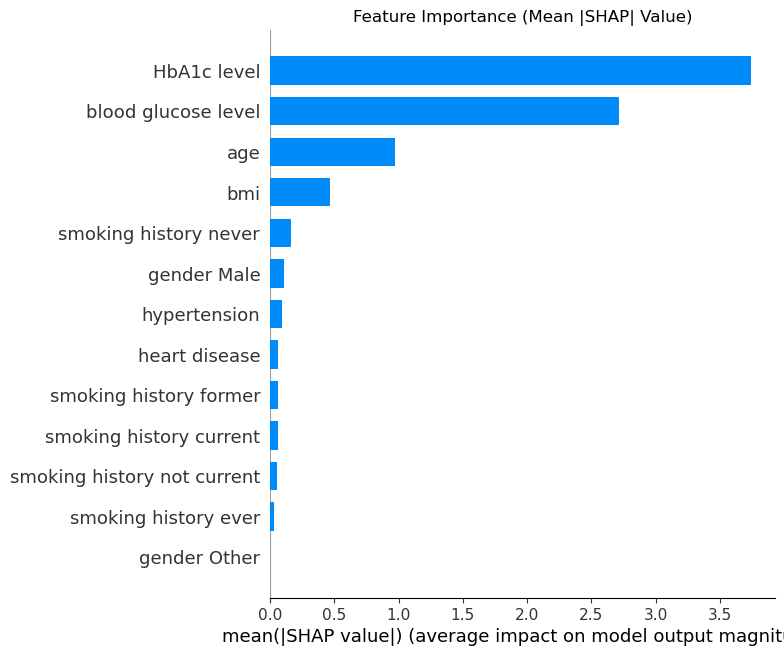

In [63]:
# =========================
# SHAP Summary Plot for Diabetes Prediction
# =========================

import shap
import matplotlib.pyplot as plt


explainer = shap.TreeExplainer(xgb_model.best_estimator_)   
shap_values = explainer.shap_values(X_test_processed)


# Using class 1 (diabetic class)
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# --- GLOBAL SUMMARY PLOT (most important features) ---
plt.figure(figsize=(4,4))
shap.summary_plot(shap_values, X_test_df, plot_type="dot", show=False)
plt.title("SHAP Summary Plot — Top Contributing Risk Factors")
plt.tight_layout()
plt.savefig("shap_summary_diabetes.png", dpi=300, bbox_inches="tight")
plt.show()

# --- BAR SUMMARY PLOT  ---
plt.figure(figsize=(9,7))
shap.summary_plot(shap_values, X_test_df, plot_type="bar", show=False)
plt.title("Feature Importance (Mean |SHAP| Value)")
plt.tight_layout()
plt.subplots_adjust(left=0.35, bottom=0.1)  
plt.savefig("shap_bar_importance_diabetes.png", dpi=300, bbox_inches="tight")
plt.show()



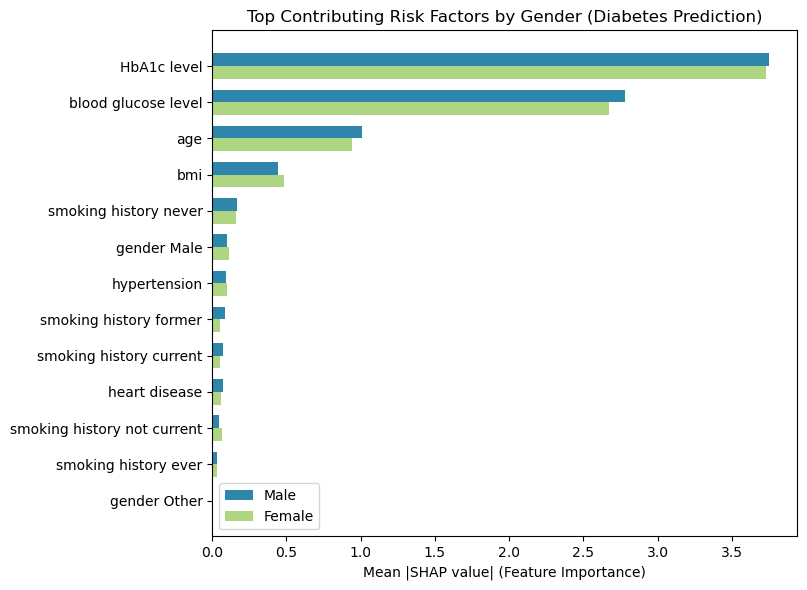

In [64]:



male_mask = X_test_df["gender Male"] == 1
female_mask = X_test_df["gender Male"] == 0

#  Compute mean(|SHAP|) per feature for each subgroup
male_importance = np.abs(shap_values[male_mask]).mean(axis=0)
female_importance = np.abs(shap_values[female_mask]).mean(axis=0)

# Create DataFrames for ranking
feature_importance = pd.DataFrame({
    "Feature": X_test_df.columns,
    "Male": male_importance,
    "Female": female_importance
})

# Sort by Male or Female importance (choose one to order)
feature_importance_sorted = feature_importance.sort_values(by="Male", ascending=False)

# Plot comparison
plt.figure(figsize=(10,6))
bar_width = 0.35
indices = np.arange(len(feature_importance_sorted))

plt.barh(indices, feature_importance_sorted["Male"], bar_width, label="Male", color="#2E86AB")
plt.barh(indices + bar_width, feature_importance_sorted["Female"], bar_width, label="Female", color="#AED581")

plt.yticks(indices + bar_width/2, feature_importance_sorted["Feature"])
plt.xlabel("Mean |SHAP value| (Feature Importance)")
plt.title("Top Contributing Risk Factors by Gender (Diabetes Prediction)")
plt.legend()
plt.gca().invert_yaxis()  # highest on top
plt.tight_layout()
plt.subplots_adjust(left=0.4)  # prevent text cutoff
plt.savefig("shap_gender_comparison.png", dpi=300, bbox_inches="tight")
plt.show()


In [65]:
top_male = feature_importance.sort_values(by="Male", ascending=False).head(5)
top_female = feature_importance.sort_values(by="Female", ascending=False).head(5)

print("Top 5 Male Risk Factors:\n", top_male[["Feature", "Male"]])
print("\nTop 5 Female Risk Factors:\n", top_female[["Feature", "Female"]])


Top 5 Male Risk Factors:
                   Feature      Male
4             HbA1c level  3.752437
5     blood glucose level  2.777115
0                     age  1.006034
3                     bmi  0.440908
11  smoking history never  0.167740

Top 5 Female Risk Factors:
                   Feature    Female
4             HbA1c level  3.733009
5     blood glucose level  2.673638
0                     age  0.944255
3                     bmi  0.482950
11  smoking history never  0.160504


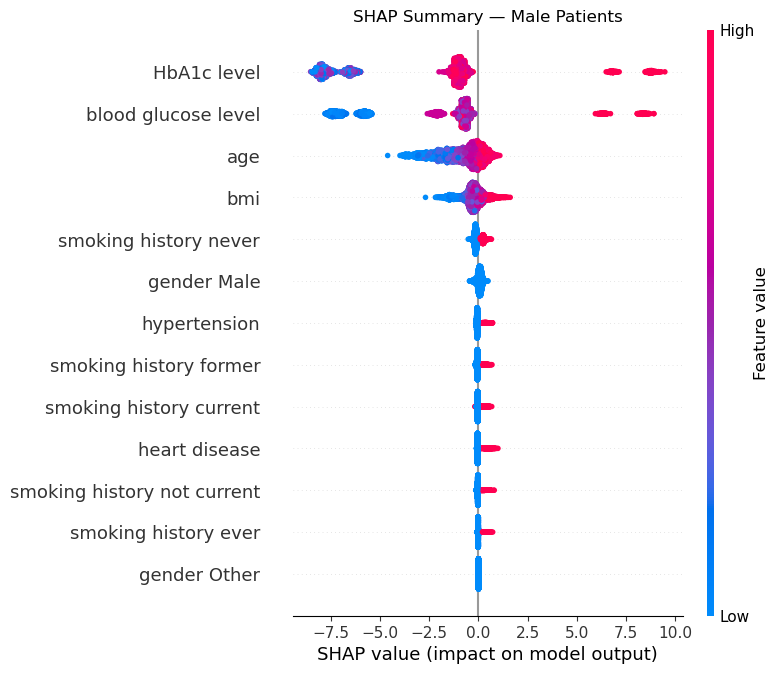

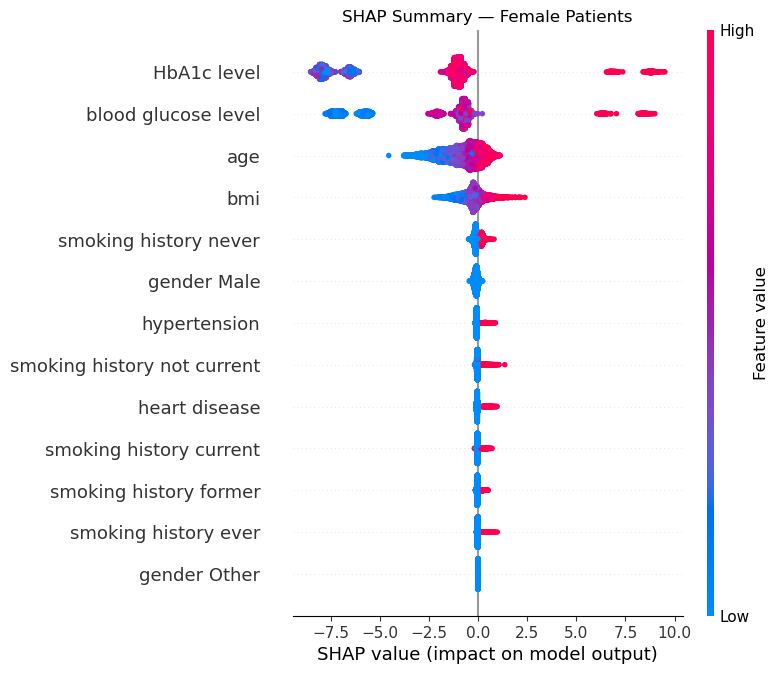

In [66]:
shap.summary_plot(shap_values[male_mask], X_test_df[male_mask], show=False)
plt.title("SHAP Summary — Male Patients")
plt.savefig("shap_males", dpi=300, bbox_inches="tight")
plt.show()

shap.summary_plot(shap_values[female_mask], X_test_df[female_mask], show=False)
plt.title("SHAP Summary — Female Patients")
plt.savefig("shap_females", dpi=300, bbox_inches="tight")
plt.show()


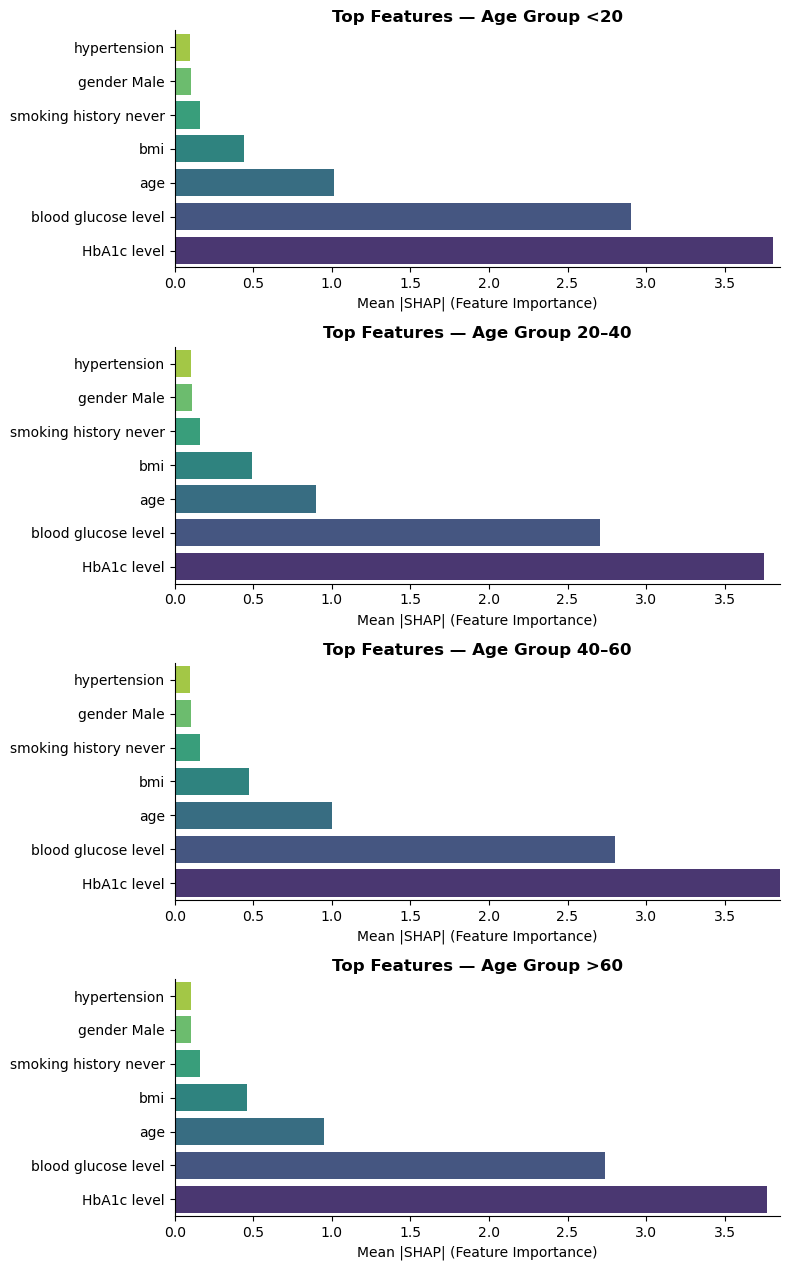

In [67]:
import seaborn as sns

bins = [0, 20, 40, 60, 120]
labels = ['<20', '20–40', '40–60', '>60']

X_test_df['age_group'] = pd.cut(X_test['age'], bins=bins, labels=labels, right=False)

feature_columns = [col for col in X_test_df.columns if col != 'age_group']

age_group_importances = {}
for group in labels:
    mask = X_test_df['age_group'] == group
    if mask.sum() == 0:
        continue
    mean_abs_shap = np.abs(shap_values[mask]).mean(axis=0)
    df = pd.DataFrame({
        'Feature': feature_columns,
        'Mean |SHAP|': mean_abs_shap
    }).sort_values(by='Mean |SHAP|', ascending=False)
    age_group_importances[group] = df


global_max_shap = max(df["Mean |SHAP|"].max() for df in age_group_importances.values())


n_groups = len(age_group_importances)
fig, axes = plt.subplots(nrows=n_groups, ncols=1, figsize=(8, 3.2*n_groups))

if n_groups == 1:
    axes = [axes]

for ax, (group, df) in zip(axes, age_group_importances.items()):
    top_n = df.head(7)
    sns.barplot(
        data=top_n,
        x='Mean |SHAP|',
        y='Feature',
        hue='Feature',
        palette='viridis',
        ax=ax,
        legend=False
    )
    ax.set_xlim(0, global_max_shap)  # 🔥 same x-axis range
    ax.set_title(f"Top Features — Age Group {group}", fontsize=12, weight='bold')
    ax.set_xlabel("Mean |SHAP| (Feature Importance)")
    ax.set_ylabel("")
    ax.invert_yaxis()
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.savefig("shap_agegroup_comparable.png", dpi=300, bbox_inches="tight")
plt.show()


In [68]:
#SAVE FINAL MODEL FOR DEPLOYMENT

In [69]:
import joblib

# Save ensemble
joblib.dump(ensemble, "final_ensemble_model.pkl")



['final_ensemble_model.pkl']

In [70]:
# Saving in native keras format
model.save("dnn_model.keras")


